<a href="https://colab.research.google.com/github/amanverse/Machine-Learning-Models/blob/main/CNN_cats_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poblem Statement:- Take any dataset (in multiclass class) and prepare the model to solve the classification and prepare the model to solve the classification problem using CNN. Write an analysis after changing the parameters (Hyper Parameter Tuning). 

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [ ]:
!unzip kagglecatsanddogs_5340.zip

In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Dog/6403.jpg      1
1   PetImages/Dog/6935.jpg      1
2   PetImages/Cat/8514.jpg      0
3   PetImages/Cat/2147.jpg      0
4  PetImages/Cat/11143.jpg      0

In [ ]:
# locate not .jpg files 
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [ ]:
# locate corrupt files
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Cat/Thumbs.db']

In [ ]:
# delete above located files files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

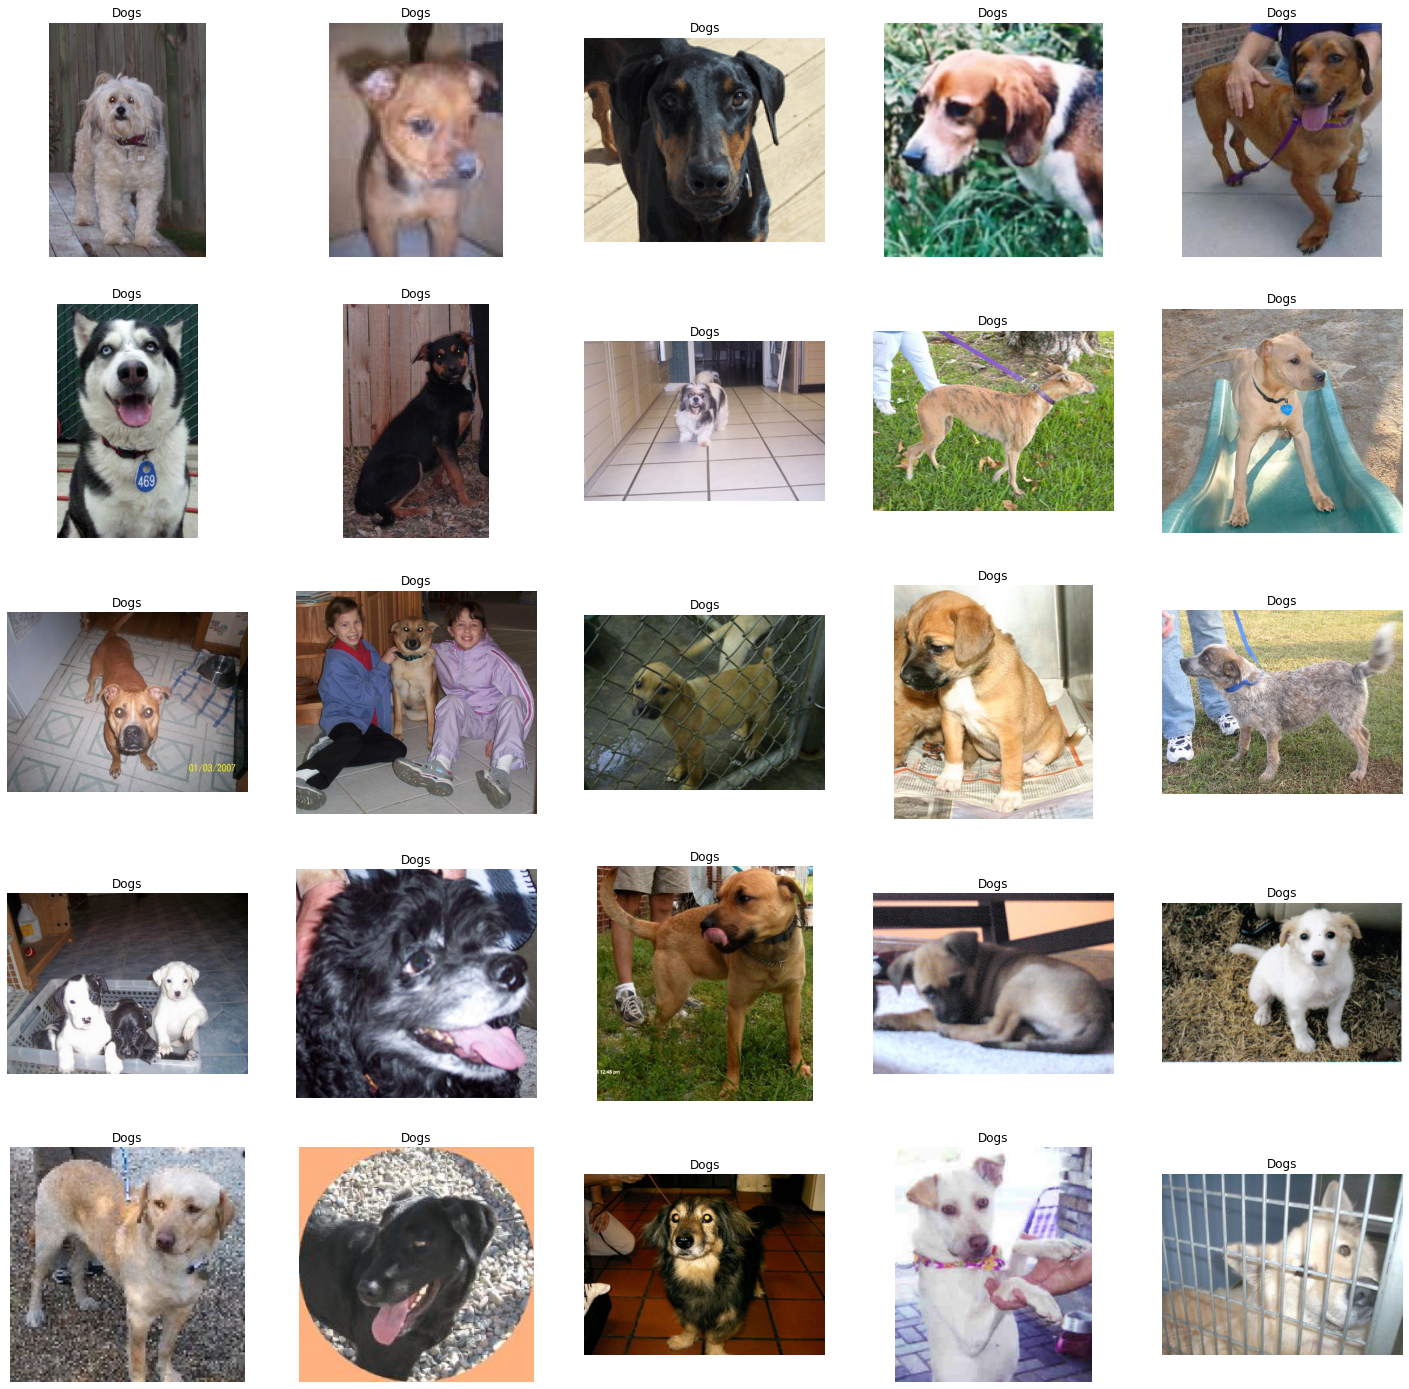

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

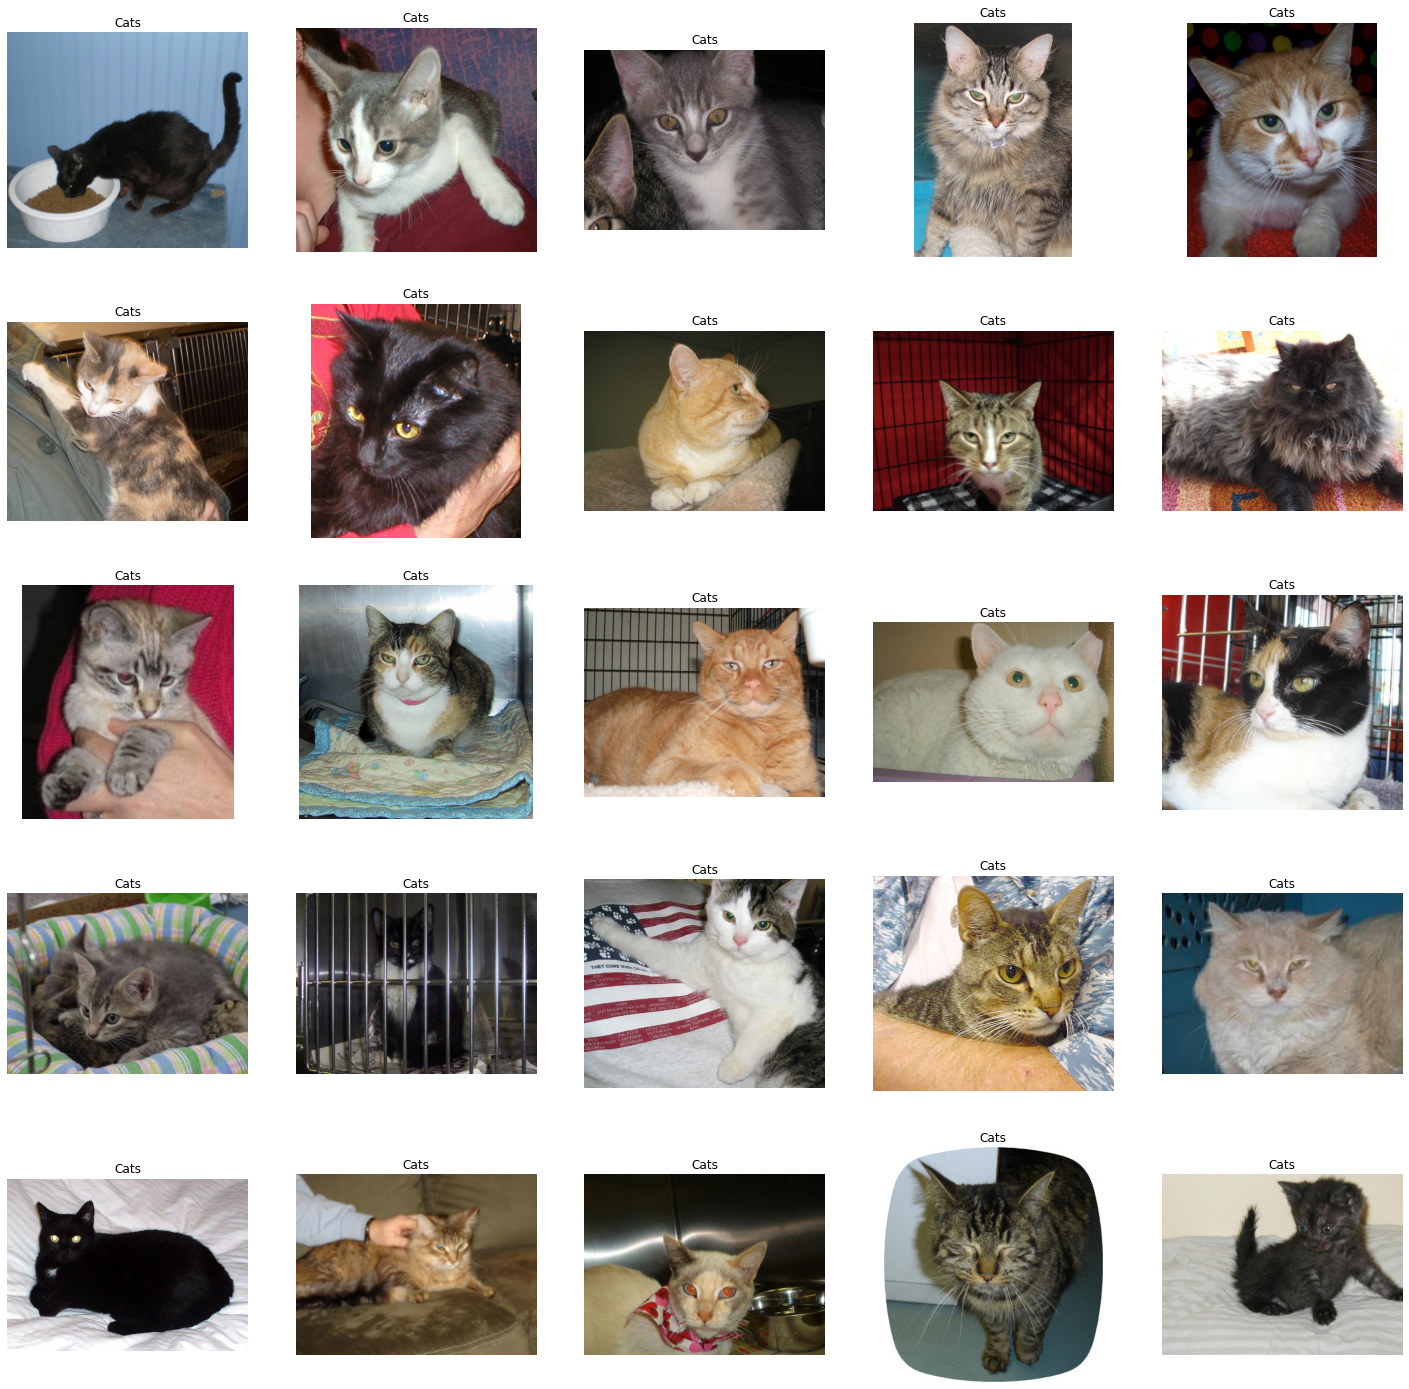

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')


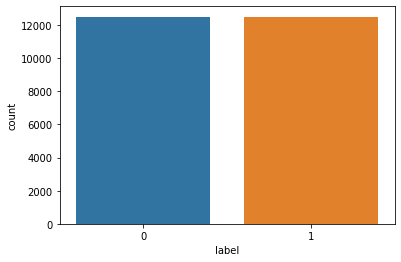

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_data = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_data = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
40/40 [==============================] - 151s 3s/step - loss: 0.7893 - accuracy: 0.5140 - val_loss: 0.6630 - val_accuracy: 0.6160
Epoch 2/10
40/40 [==============================] - 124s 3s/step - loss: 0.6369 - accuracy: 0.6332 - val_loss: 0.6351 - val_accuracy: 0.6364
Epoch 3/10
40/40 [==============================] - 125s 3s/step - loss: 0.5869 - accuracy: 0.6884 - val_loss: 0.5417 - val_accuracy: 0.7302
Epoch 4/10
40/40 [==============================] - 127s 3s/step - loss: 0.5568 - accuracy: 0.7132 - val_loss: 0.5149 - val_accuracy: 0.7470
Epoch 5/10
40/40 [==============================] - 124s 3s/step - loss: 0.5361 - accuracy: 0.7290 - val_loss: 0.4977 - val_accuracy: 0.7646
Epoch 6/10
40/40 [==============================] - 123s 3s/step - loss: 0.5074 - accuracy: 0.7510 - val_loss: 0.4787 - val_accuracy: 0.7744
Epoch 7/10
40/40 [==============================] - 124s 3s/step - loss: 0.5040 - accuracy: 0.7543 - val_loss: 0.4734 - val_accuracy: 0.7738
Epoch 8/10
40

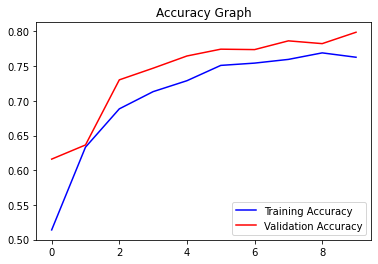

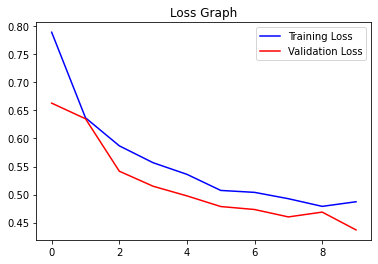

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# **Hyperparameter Tuning**

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=16, max_value=32, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(128,128,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=64, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="CAT vs DOG")

INFO:tensorflow:Reloading Oracle from existing project output/CAT vs DOG/oracle.json
INFO:tensorflow:Reloading Tuner from output/CAT vs DOG/tuner0.json


In [ ]:
tuner_search.search(train_data,epochs=3,validation_data=val_data)

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.fit(train_data, epochs=10, validation_data= val_data, initial_epoch=3)

# **Analysis: Changing the hyperparameter by hyperparameter tuning using kerastuner.engine.hyperparameters leads the accuracy of be 0.9456 whereas the previous model acquired the accuracy of just 0.7988**